# Proyecto Final Modulo 6 – Proyecto MLB Stats
## Grupo 3 - D.A.T.A
* Arlene Miniel
* Elvis Rafael Rosado
* Felix Mendoza
* Samir Ernesto Castillo

#### En este proyecto se desarrollaron tres variables objetivo (Variable Objetivos) a partir de métricas ofensivas del dataset de MLB, con el propósito de analizar y clasificar el rendimiento de los bateadores desde diferentes perspectivas: rendimiento general, nivel elite y disciplina en el plato. Cada Variable Objetivo fue construido directamente a partir de estadísticas del dataset mediante reglas claras y cuantificables.

#### El enfoque principal es demostrar cómo los modelos de Machine Learning pueden identificar patrones en los datos para diferenciar perfiles ofensivos, apoyándose tanto en métricas tradicionales como en estadísticas avanzadas.


### Origen del dataset:
* https://baseballsavant.mlb.com/statcast_search?hfPT=&hfAB=&hfGT=R%7C&hfPR=&hfZ=&hfStadium=&hfBBL=&hfNewZones=&hfPull=&hfC=&hfSea=2025%7C2024%7C2023%7C&hfSit=&player_type=batter&hfOuts=&home_road=&pitcher_throws=&batter_stands=&hfSA=&hfEventOuts=&hfEventRuns=&game_date_gt=&game_date_lt=&hfMo=&hfTeam=&hfOpponent=&hfRO=&position=&hfInfield=&hfOutfield=&hfInn=&hfBBT=&hfFlag=&metric_1=&group_by=name&min_pitches=0&min_results=0&min_pas=0&sort_col=pitches&player_event_sort=api_p_release_speed&sort_order=desc#results

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ruta = r"D:\\Python\\Modulo 6\\Databases\\MLBDATA.csv"
df = pd.read_csv(ruta)
print(df.shape)
df.head()


(911, 76)


,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,xslgdiff,wobadiff,swing_miss_percent,arm_angle,attack_angle,attack_direction,swing_path_tilt,rate_ideal_attack_angle,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,9205,621566,"Olson, Matt",9269,99.3,0.267,0.247,0.310,0.515,0.373,...,0.009,0.007,26.9,37.6,7.731136,0.886307,34.153998,0.438311,37.721414,32.547631
1,8979,656941,"Schwarber, Kyle",9043,99.3,0.228,0.280,0.255,0.508,0.369,...,-0.024,-0.014,32.2,37.6,13.586557,-4.043434,29.735136,0.638533,35.738376,31.702802
2,8825,665742,"Soto, Juan",8929,98.8,0.275,0.263,0.288,0.538,0.402,...,-0.063,-0.031,21.5,37.4,10.617923,4.717456,27.399721,0.601278,39.222906,23.550901
3,8394,596019,"Lindor, Francisco",8420,99.7,0.265,0.214,0.287,0.479,0.353,...,-0.006,-0.004,22.4,38.5,10.871344,-0.683622,33.534852,0.522456,35.191361,29.000682
4,8326,668227,"Arozarena, Randy",8342,99.8,0.237,0.176,0.294,0.413,0.333,...,0.002,0.001,29.5,38.5,8.859032,0.861728,25.119462,0.636134,35.208717,31.022207


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 76 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   pitches                                   911 non-null    int64  
 1   player_id                                 911 non-null    int64  
 2   player_name                               911 non-null    object 
 3   total_pitches                             911 non-null    int64  
 4   pitch_percent                             911 non-null    float64
 5   ba                                        911 non-null    float64
 6   iso                                       911 non-null    float64
 7   babip                                     898 non-null    float64
 8   slg                                       911 non-null    float64
 9   woba                                      911 non-null    float64
 10  xwoba                                 

Calculo de valores nulos para identicar si hay valores faltantes en los datos

In [29]:
df.isnull().sum()



pitches                                      0
player_id                                    0
player_name                                  0
total_pitches                                0
pitch_percent                                0
                                            ..
attack_direction                            46
swing_path_tilt                             46
rate_ideal_attack_angle                     46
intercept_ball_minus_batter_pos_x_inches    46
intercept_ball_minus_batter_pos_y_inches    46
Length: 76, dtype: int64

Eliminamos las filas con valores nulos con inplace

In [30]:
df.dropna(inplace=True)
print(df.shape)

(857, 76)


## Variable Objetivo 1: Rendimiento del Bateador (Bajo, Medio, Alto)
Se creó la variable Rendimiento_labels utilizando la métrica wOBA, la cual resume el valor ofensivo general del bateador. Los jugadores fueron divididos en tres grupos (Bajo, Medio y Alto) usando cuantiles, lo que garantiza una distribución equilibrada entre las clases.

Este Variable Objetivo permite clasificar a los jugadores según su nivel general de producción ofensiva y sirve como una segmentación inicial del rendimiento.


In [31]:
Metricas = ["player_name","woba", "xwoba", "hardhit_percent", "barrels_total", "hits"]

print("Metricas disponibles:", [x for x in Metricas if x in df.columns])

cols_show = ["player_name", "woba", "xwoba", "hardhit_percent", "barrels_total", "hits"]
df[cols_show].head()



Metricas disponibles: ['player_name', 'woba', 'xwoba', 'hardhit_percent', 'barrels_total', 'hits']


,player_name,woba,xwoba,hardhit_percent,barrels_total,hits
0,"Olson, Matt",0.373,0.366,52.219714,192.0,490
1,"Schwarber, Kyle",0.369,0.383,54.763948,206.0,402
2,"Soto, Juan",0.402,0.433,55.925926,230.0,474
3,"Lindor, Francisco",0.353,0.357,45.344130,162.0,494
4,"Arozarena, Randy",0.333,0.332,47.642680,130.0,406


Mostramos un top 10 de jugadores segun el Xwoba

In [32]:
print("Top 10 por xwOBA")
df[cols_show].sort_values("xwoba", ascending=False).head(10)

Top 10 por xwOBA


,player_name,woba,xwoba,hardhit_percent,barrels_total,hits
849,"Downs, Jeter",0.505,0.523,50.000000,0.0,2
868,"Collins, Zack",0.526,0.519,100.000000,0.0,2
35,"Judge, Aaron",0.457,0.469,60.886700,267.0,457
897,"Lopez, Alejo",0.622,0.460,0.000000,0.0,1
720,"Jensen, Carter",0.403,0.447,58.333333,10.0,18
11,"Ohtani, Shohei",0.427,0.433,58.015873,273.0,520
2,"Soto, Juan",0.402,0.433,55.925926,230.0,474
124,"Acuña Jr., Ronald",0.403,0.424,53.582888,136.0,363
149,"Alvarez, Yordan",0.397,0.419,51.086957,144.0,335
128,"Seager, Corey",0.384,0.401,52.478952,163.0,391


In [33]:
print("Top 10 por Hard Hit %")

df[cols_show].sort_values("hardhit_percent", ascending=False).head(10)


Top 10 por Hard Hit %


,player_name,woba,xwoba,hardhit_percent,barrels_total,hits
910,"Seagle, Chandler",0.000,0.302,100.000000,0.0,0
895,"Wainwright, Adam",0.000,0.119,100.000000,0.0,0
868,"Collins, Zack",0.526,0.519,100.000000,0.0,2
834,"Almonte, Abraham",0.121,0.182,71.428571,1.0,1
792,"Eldridge, Bryce",0.242,0.362,68.750000,4.0,3
851,"Navarreto, Brian",0.362,0.330,66.666667,3.0,4
884,"Devers, José",0.220,0.340,66.666667,0.0,1
832,"Flores Jr., Rafael",0.281,0.361,62.500000,1.0,3
35,"Judge, Aaron",0.457,0.469,60.886700,267.0,457
484,"Anthony, Roman",0.376,0.372,60.693642,27.0,75


Utilizamos un grafico de dispersion para mostrar la relación entre wOBA y xwOBA asi podemos ver la desviacion del rendimiento

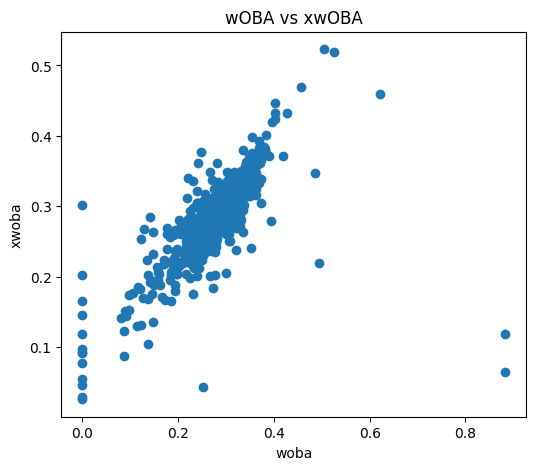

In [34]:
plt.figure(figsize=(6,5))
plt.scatter(df["woba"], df["xwoba"])
plt.title("wOBA vs xwOBA")
plt.xlabel("woba")
plt.ylabel("xwoba")
plt.show()


En estea parte analizamos graficamente la correlación de Hard Hit y Barrels Total

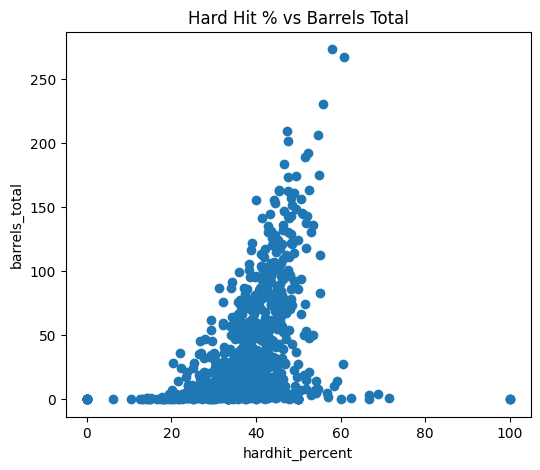

In [35]:
plt.figure(figsize=(6,5))
plt.scatter(df["hardhit_percent"], df["barrels_total"])
plt.title("Hard Hit % vs Barrels Total")
plt.xlabel("hardhit_percent")
plt.ylabel("barrels_total")
plt.show()


1.  importamos las librerias y el modelo para pasarle los datos y entrenarlo
2. Caracteristicas que le pasariamos al modelo
3. añadimos 3 categorias para identificar los niveles del Woba Alto, Mediano y Bajo
4. Pasamos los datos a X y Y
5. Dividimos el conjunto de datos en 80% entrenamiento y 20% prueba


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Caracteristicas = ["xwoba", "hardhit_percent", "barrels_total", "hits"]

df["Rendimiento_labels"] = pd.qcut(
    df["woba"],
    q=3,
    labels=["Bajo", "Medio", "Alto"]
)

X = df[Caracteristicas]
Y = df["Rendimiento_labels"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Le especificamos las instrucciones al modelo y luego se le pasa el conjunto de entranamiento

In [37]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=42)
dt.fit(X_train, Y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",20
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [38]:
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
rf.fit(X_train, Y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

Generemos prediccion con el cojunto de prueba y mostramos el rendimiento del modelo

In [39]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier Accuracy:", X_test,y_pred_dt)

Decision Tree Classifier Accuracy:      xwoba  hardhit_percent  barrels_total  hits
724  0.243        48.648649            4.0     9
603  0.261        33.333333            4.0    33
120  0.366        47.776511          111.0   318
208  0.322        43.450479           73.0   224
380  0.341        46.052632           32.0   135
..     ...              ...            ...   ...
549  0.315        54.545455            8.0    33
235  0.281        26.030928           10.0   218
333  0.277        35.469108           24.0   126
215  0.285        40.338983           71.0   189
814  0.204         6.250000            0.0     3

[172 rows x 4 columns] ['Bajo' 'Bajo' 'Alto' 'Medio' 'Alto' 'Alto' 'Bajo' 'Medio' 'Bajo' 'Medio'
 'Bajo' 'Medio' 'Bajo' 'Medio' 'Bajo' 'Medio' 'Medio' 'Medio' 'Medio'
 'Medio' 'Medio' 'Bajo' 'Bajo' 'Bajo' 'Bajo' 'Medio' 'Bajo' 'Bajo' 'Bajo'
 'Medio' 'Medio' 'Bajo' 'Medio' 'Medio' 'Alto' 'Bajo' 'Bajo' 'Alto'
 'Medio' 'Bajo' 'Alto' 'Alto' 'Bajo' 'Medio' 'Medio' 'Alto' 'Medio'

Evaluamos el rendimiento con metricas de clasificacion y mostramos los resultados obtenido

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(Y_test, y_pred_dt)
recall = recall_score(Y_test, y_pred_dt, average='weighted')
precision = precision_score(Y_test, y_pred_dt, average='weighted')
f1 = f1_score(Y_test, y_pred_dt, average='weighted')

print(f"Árbol de Decisión - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Árbol de Decisión - Accuracy: 0.6337, Precision: 0.6594, Recall: 0.6337, F1 Score: 0.6378


Utilizamos un grafico de barras para mostrar la importancia de las caracteristicas

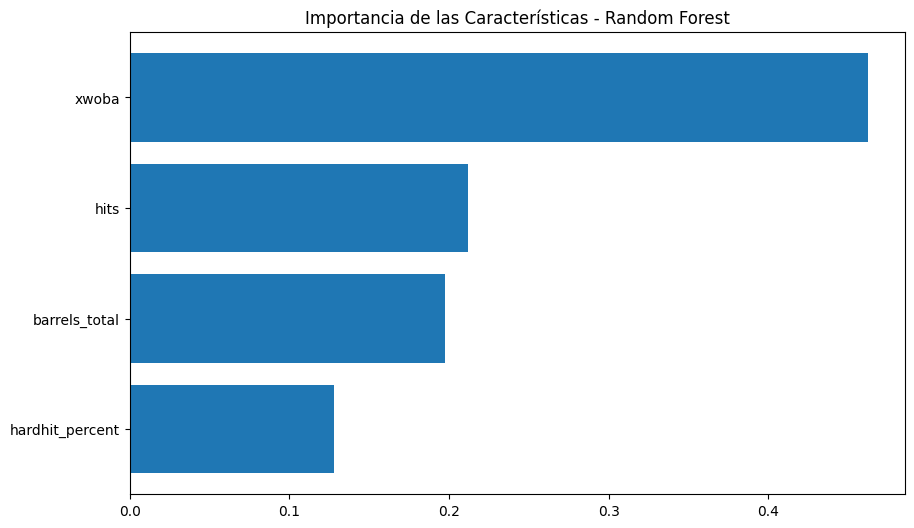

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importancias = rf.feature_importances_
indices = np.argsort(importancias)
plt.figure(figsize=(10, 6))

plt.title('Importancia de las Características - Random Forest')
plt.barh(range(len(indices)), importancias[indices], align='center')
plt.yticks(range(len(indices)), [Caracteristicas[i] for i in indices])
plt.show()

El análisis de importancia de variables indica que xwOBA y Hit son los predictores más relevantes para clasificar el rendimiento ofensivo, lo que concuerda con métricas modernas de calidad de contacto

## Variable Objetivo 2: Elite Hitter (Elite vs No Elite)
Se define la variable objetivo Elite Hitter para indicar si un bateador pertenece o no al grupo de jugadores con mejor rendimiento ofensivo. Un jugador se considera elite cuando muestra valores altos en métricas que reflejan buena calidad de contacto y buen desempeño al bate, como xwOBA, barrels y hard hit percentage. 

Este Variable Objetivo se trabaja como un problema de clasificación porque no se busca predecir un valor numérico, sino decidir en cuál grupo cae cada jugador: elite o no elite. De esta manera, el modelo puede enfocarse en distinguir a los bateadores de alto impacto del resto.


In [42]:
df["elite_hitter"] = (df["woba"] >= df["woba"].quantile(0.80)).astype(int)
df[["player_name", "woba", "elite_hitter"]].head()

,player_name,woba,elite_hitter
0,"Olson, Matt",0.373,1
1,"Schwarber, Kyle",0.369,1
2,"Soto, Juan",0.402,1
3,"Lindor, Francisco",0.353,1
4,"Arozarena, Randy",0.333,1


In [43]:
df["elite_hitter"].value_counts()

elite_hitter
0    684
1    173
Name: count, dtype: int64

Define las variables predictoras relacionadas con calidad de contacto y poder ofensivo (X) y establece como variable objetivo (y) la etiqueta que indica si el jugador es un bateador élite.

In [44]:
features_elite = [
    "xwoba",
    "hardhit_percent",
    "barrels_total",
    "slg",
    "xslg"
]

X = df[features_elite]
y = df["elite_hitter"]

Dividimos los datos en entrenamiento (80%) y prueba (20%)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Entrenamos el Random Forest para clasificar jugadores, configurado con múltiples árboles, profundidad controlada y balanceo de clases, usando los datos de entrenamiento (X_train, y_train).

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_elite = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    class_weight="balanced",
    random_state=42
)

rf_elite.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

Muestra en pantalla las métricas de evaluación del modelo Random Forest.

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_elite.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Elite vs No Elite - Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1: {f1:.4f}")

Elite vs No Elite - Accuracy: 0.9186
Precision: 0.8621
Recall: 0.7143
F1: 0.7812


Grafico para ver la cantidad de jugares que pertenecer a la Elite y cuantos no

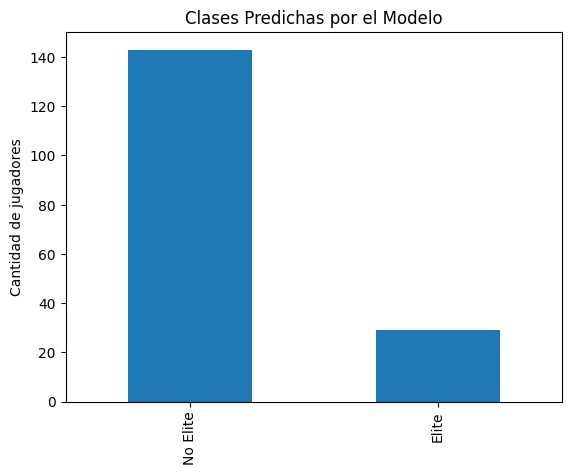

In [48]:
import pandas as pd

pd.Series(y_pred).value_counts().plot(kind="bar")
plt.xticks([0,1], ["No Elite", "Elite"])
plt.ylabel("Cantidad de jugadores")
plt.title("Clases Predichas por el Modelo")
plt.show()

C:\Users\samir\AppData\Local\Temp\ipykernel_12344\3024696796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


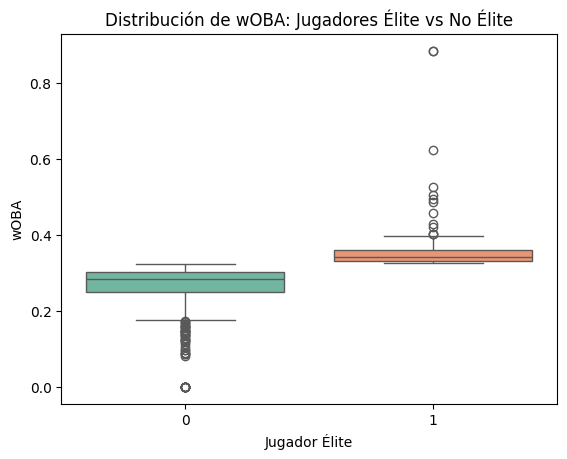

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=df,
    x="elite_hitter",
    y="woba",
    palette="Set2",
    
)
plt.title("Distribución de wOBA: Jugadores Élite vs No Élite")
plt.xlabel("Jugador Élite")
plt.ylabel("wOBA")
plt.show()


El gráfico muestra que los jugadores élite, en promedio, batean mejor (wOBA más alto), pero el wOBA por sí solo no es suficiente para identificar a todos los jugadores élite.

Visualizacion de las caracteristicas más importantes para nuestro modelo precedir si un jugador es Elite o no

barrels_total      0.070510
hardhit_percent    0.078027
xslg               0.156665
xwoba              0.246125
slg                0.448673
dtype: float64


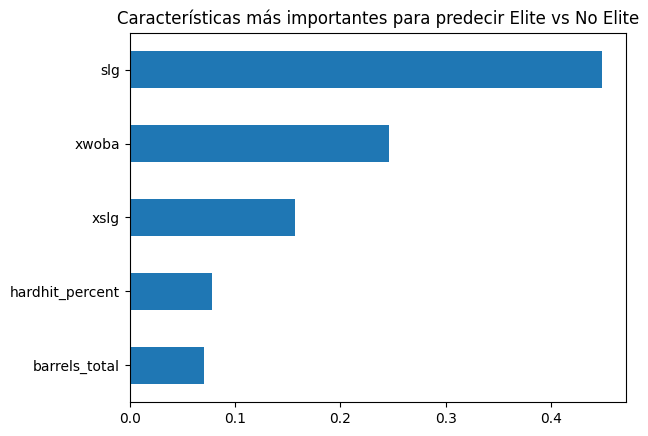

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

rf = rf_elite

importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
)

importances = importances.sort_values(ascending=True)

print(importances.head(15))

importances.head(15).plot(kind="barh")
plt.title("Características más importantes para predecir Elite vs No Elite")
plt.show()

## Variable Objetivo 3: Disciplina en el Plato (Baja, Media, Alta)

Se creó una métrica compuesta de disciplina que considera el comportamiento del bateador en el home plate, tomando en cuenta el swings, swings fallidos, bases por bolas y tendencia a poncharse. A partir de esta métrica, los jugadores se dividieron en tres categorías: Baja, Media y Alta disciplina, utilizando cuantiles.

Este Variable Objetivo busca medir qué tan bien selecciona lanzamientos un bateador y qué tan consistente es su contacto, independientemente de su poder.



In [51]:
df["disciplina_en_home"] = (
    df["bb_percent"] * 0.30 +
    df["takes"] * 0.20 +
    df["pa"] * 0.10
    - df["k_percent"] * 0.20
    - df["swing_miss_percent"] * 0.10
    - df["whiffs"] * 0.05
    - df["swings"] * 0.05
)

Clasificamos a los jugadores en Baja, Media o Alta disciplina usando rangos fijos sobre la variable disciplina_en_home mediante pd.cut.

In [52]:
df["clase_disciplina_home"] = pd.cut(
    df["disciplina_en_home"],
    bins=[-999, 200, 800, 1200],
    labels=["Baja", "Media", "Alta"]
)

df[["player_name", "disciplina_en_home", "clase_disciplina_home"]].head()

,player_name,disciplina_en_home,clase_disciplina_home
0,"Olson, Matt",904.84,Alta
1,"Schwarber, Kyle",1054.15,Alta
2,"Soto, Juan",1145.51,Alta
3,"Lindor, Francisco",831.29,Alta
4,"Arozarena, Randy",920.75,Alta


In [53]:
df["clase_disciplina_home"].value_counts()


clase_disciplina_home
Baja     465
Media    361
Alta      31
Name: count, dtype: int64

In [54]:
features_disc = [
    "bb_percent",
    "k_percent",
    "swing_miss_percent",
    "swings",
    "whiffs",
    "takes",
    "pa"
]

X = df[features_disc]
y = df["clase_disciplina_home"]

Lo utilizamos para ver la cantidad de nulos en nuestras columnas X e Y

In [55]:
print("NaN en X por columna:\n", X.isna().sum())
print("\nNaN en y:\n", y.isna().sum())


NaN en X por columna:
 bb_percent            0
k_percent             0
swing_miss_percent    0
swings                0
whiffs                0
takes                 0
pa                    0
dtype: int64

NaN en y:
 0


Este bloque garantiza que el modelo se entrene solo con datos completos, consistentes y alineados, reduciendo errores técnicos y mejorando la calidad del aprendizaje

In [56]:
data = pd.concat([X, y], axis=1).dropna()

X = data[features_disc]
y = data["clase_disciplina_home"]  

print("Nuevo tamaño:", X.shape, y.shape)

Nuevo tamaño: (857, 7) (857,)


División de los datos para el entrenamiento y prueba

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Entrenando el modelo Random Forest usando los datos de entrenamiento y las etiquetas de disciplina en el plato.

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_disc = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_disc.fit(X_train, y_train)
print("Random Forest entrenado (Disciplina en el Plato)")


Random Forest entrenado (Disciplina en el Plato)


Muestra en pantalla las métricas de evaluación del modelo Random Forest.

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_disc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"RF Disciplina - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")


RF Disciplina - Accuracy: 0.9826, Precision: 0.9827, Recall: 0.9826, F1: 0.9824


Grafico para visualizar la distribución de los jugadores en las diferentes categorias

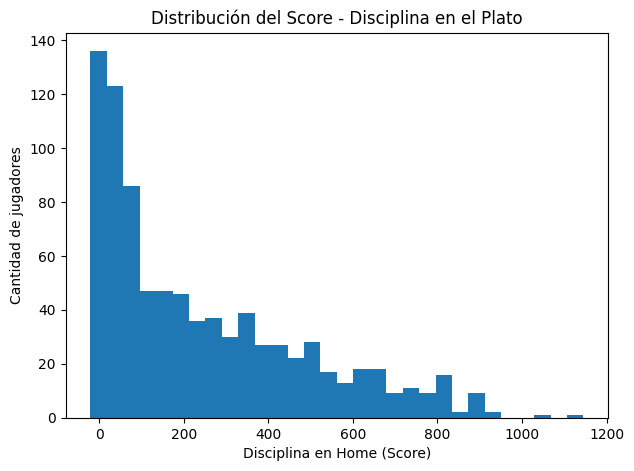

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(df["disciplina_en_home"], bins=30)
plt.xlabel("Disciplina en Home (Score)")
plt.ylabel("Cantidad de jugadores")
plt.title("Distribución del Score - Disciplina en el Plato")
plt.show()


Grafico para visualizar la distribución de los jugadores en las diferentes categorias

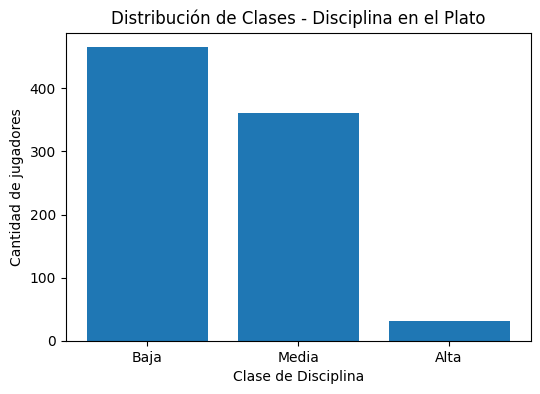

In [61]:
orden = ["Baja", "Media", "Alta"]
conteo = df["clase_disciplina_home"].value_counts().reindex(orden)

plt.figure(figsize=(6,4))
plt.bar(conteo.index, conteo.values)
plt.xlabel("Clase de Disciplina")
plt.ylabel("Cantidad de jugadores")
plt.title("Distribución de Clases - Disciplina en el Plato")
plt.show()


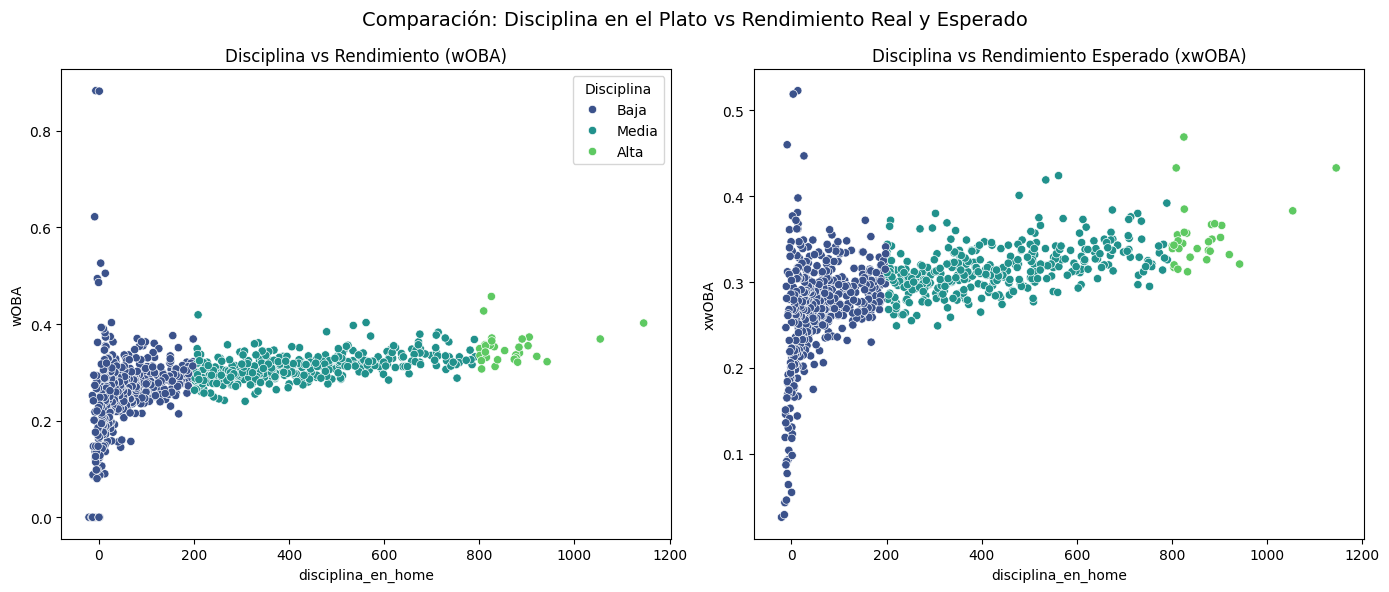

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

sns.scatterplot(
    data=df,
    x="disciplina_en_home",
    y="woba",
    hue="clase_disciplina_home",
    palette="viridis",
    ax=axes[0]
)
axes[0].set_title("Disciplina vs Rendimiento (wOBA)")
axes[0].set_ylabel("wOBA")
axes[0].legend(title="Disciplina")

sns.scatterplot(
    data=df,
    x="disciplina_en_home",
    y="xwoba",
    hue="clase_disciplina_home",
    palette="viridis",
    ax=axes[1],
    legend=False
)
axes[1].set_title("Disciplina vs Rendimiento Esperado (xwOBA)")
axes[1].set_ylabel("xwOBA")

plt.suptitle("Comparación: Disciplina en el Plato vs Rendimiento Real y Esperado", fontsize=14)
plt.tight_layout()
plt.show()


Al comparar disciplina en el plato con wOBA y xwOBA, se observa que la relación con xwOBA es más clara y consistente.
Mientras que wOBA refleja el rendimiento real influenciado por factores externos como la defensa y la variabilidad del juego, xwOBA captura el rendimiento esperado basado en la calidad del contacto.
Esto sugiere que la disciplina en el plato se asocia más fuertemente con el rendimiento ofensivo esperado que con el resultado final observado.

Grafico para demostras las importancias de las variables utilizadas en el modelo 


swing_miss_percent    0.013155
k_percent             0.017991
bb_percent            0.065486
whiffs                0.109166
swings                0.163903
pa                    0.243082
takes                 0.387217
dtype: float64


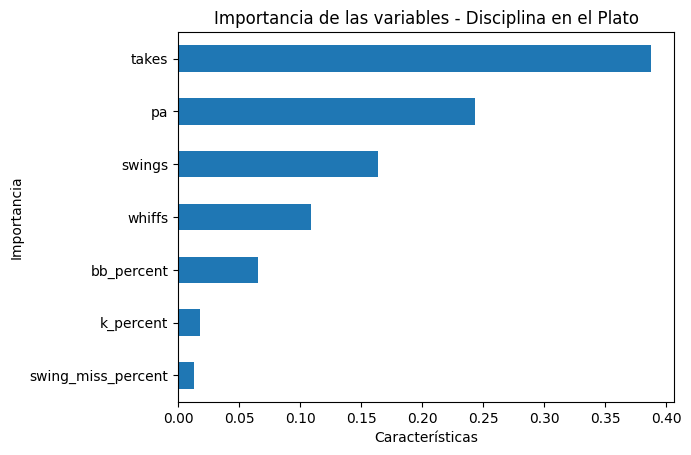

In [63]:
import pandas as pd

importancias = pd.Series(
    rf_disc.feature_importances_,
    index=features_disc
).sort_values(ascending=True)

print(importancias)

importancias.plot(kind="barh")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.title("Importancia de las variables - Disciplina en el Plato")
plt.show()
